### The simulation was run with only one seed for the random generator.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

import particles
from moments import SpatialMoments
# from moments import sample_compute_moments
# from utils import first_moment_shading
from utils import Graphs

%matplotlib inline
sns.set(style="ticks")
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [56]:
m0x = pd.read_csv('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/0_moments_x.csv',index_col=0)
m0x.head()

,m0_250,m0_500,m0_750,m0_1000,m0_1250,m0_1500,m0_1750,m0_2000
0.00,1000,1000,1000,1000,1000,1000,1000,1000
0.01,1000,1000,999,1000,1000,1000,1000,1000
0.02,999,1000,999,1000,1000,1000,1000,1000
0.03,999,1000,999,999,1000,1000,1000,1000
0.04,999,1000,999,999,1000,1000,1000,1000


In [57]:
m0y = pd.read_csv('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/0_moments_y.csv',index_col=0)
m0y.head()

,m0_250,m0_500,m0_750,m0_1000,m0_1250,m0_1500,m0_1750,m0_2000
0.00,1000,1000,1000,1000,1000,1000,1000,1000
0.01,1000,1000,999,1000,1000,1000,1000,1000
0.02,999,1000,999,1000,1000,1000,1000,1000
0.03,999,1000,999,999,1000,1000,1000,1000
0.04,999,1000,999,999,1000,1000,1000,1000


In [58]:
m1x = pd.read_csv('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/1_moments_x.csv',index_col=0)
m1x.head()

,m1x_250,m1x_500,m1x_750,m1x_1000,m1x_1250,m1x_1500,m1x_1750,m1x_2000
0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,10.679141,7.160797,10.403683,8.085030,6.518178,6.609993,6.045094,5.432802
0.02,12.144717,8.526455,10.840961,9.168432,7.472807,7.566283,6.933114,6.356309
0.03,13.454158,9.646475,11.576548,10.222306,8.282357,8.126322,7.819755,7.394303
0.04,14.388169,10.733715,12.279010,11.047594,8.891159,9.028212,8.388335,8.035244


In [59]:
m1y = pd.read_csv('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/1_moments_y.csv',index_col=0)
m1y.head()

,m1y_250,m1y_500,m1y_750,m1y_1000,m1y_1250,m1y_1500,m1y_1750,m1y_2000
0.00,26.770000,26.770000,26.770000,26.770000,26.770000,26.770000,26.770000,26.770000
0.01,26.766198,27.130300,27.247796,26.794290,26.959712,27.042568,26.880658,26.961165
0.02,26.516557,27.122708,27.204646,26.759402,26.868108,26.976955,27.070535,26.919149
0.03,26.604918,26.882406,27.375422,26.748847,26.680542,26.910511,27.107041,26.935297
0.04,26.615657,26.750302,27.393473,26.843478,26.574972,26.871426,27.060486,26.954827


In [60]:
m2x = pd.read_csv('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/2_moments_x.csv',index_col=0)
m2x.head()

,m2x_250,m2x_500,m2x_750,m2x_1000,m2x_1250,m2x_1500,m2x_1750,m2x_2000
0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,0.275199,0.104805,0.263203,0.137950,0.084853,0.090553,0.076933,0.060234
0.02,0.344721,0.137793,0.280439,0.166099,0.107569,0.117427,0.090573,0.082913
0.03,0.390979,0.174387,0.301543,0.205949,0.128793,0.126989,0.110906,0.113896
0.04,0.433185,0.210130,0.323883,0.237766,0.148559,0.151571,0.121995,0.125663


In [61]:
m2y = pd.read_csv('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/2_moments_y.csv',index_col=0)
m2y.head()

,m2y_250,m2y_500,m2y_750,m2y_1000,m2y_1250,m2y_1500,m2y_1750,m2y_2000
0.00,0.716633,0.716633,0.716633,0.716633,0.716633,0.716633,0.716633,0.716633
0.01,0.837703,0.810821,0.838596,0.803745,0.789834,0.792772,0.783657,0.775734
0.02,0.846793,0.826509,0.841016,0.810214,0.795898,0.799053,0.797716,0.784283
0.03,0.862635,0.826217,0.857591,0.817836,0.795482,0.795824,0.807227,0.796413
0.04,0.863464,0.825186,0.861839,0.827543,0.796445,0.799926,0.808887,0.802910


In [145]:
se = [1, 100]

In [133]:
folder = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1'

files = ["/xy_250.txt", 
         "/xy_500.txt",
         "/xy_750.txt",
         "/xy_1000.txt",
         "/xy_1250.txt",
         "/xy_1500.txt",
         "/xy_1750.txt",
         "/xy_2000.txt"]

for f in files:
    print f.split('_')[1].split('.')[0]
d =[int(f.split('_')[1].split('.')[0]) for f in files]
files_ = [folder + f for f in files]


250
500
750
1000
1250
1500
1750
2000


In [134]:
time = np.arange(0,4,1/100.)

In [135]:
sx2 = []
for f in range(len(files_)):
    par = particles.Particles(files_[f], dimension=2, time_start=0, time_end=4, time_step=100)
    x = par.qx[par.qx<.1]
    sx = []
    for t in range(x.shape[1]):
        a = x[t]
        a = a.dropna()
        sx.append((np.sum(a**2)/a.shape[0]) - (np.sum(a**1)/a.shape[0])**2)
    sx2.append(sx)

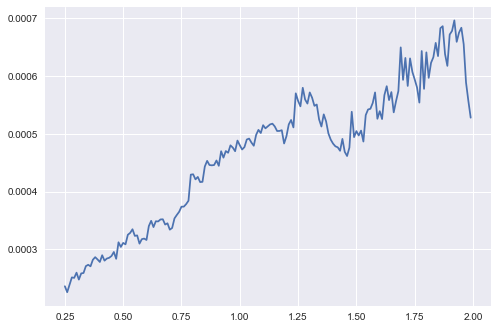

In [136]:
l,h = 25,200
plt.plot(time[l:h],sx2[5][l:h])

In [139]:
dmx = []
for i in range(len(sx2)):
    s = sx2[i][l:h]
    slope, intercept, r_value, p_value, std_err = stats.linregress(time[l:h],s)
    #print(r_value**2, intercept)
    dmx.append(slope/2)

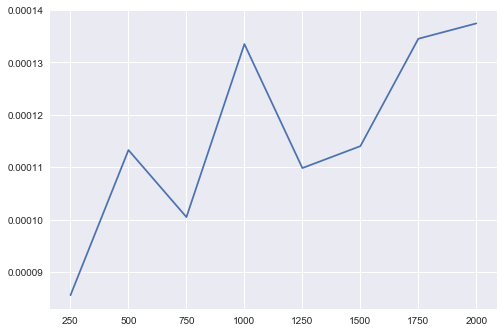

In [140]:
plt.plot(d, dmx)

In [141]:
sy2 = []
for f in range(len(files_)):
    par = particles.Particles(files_[f], dimension=2, time_start=0, time_end=4, time_step=100)
    y = par.qy[par.qy<.1]
    sy = []
    for t in range(y.shape[1]):
        a = y[t]
        a = a.dropna()
        sy.append((np.sum(a**2)/a.shape[0]) - (np.sum(a**1)/a.shape[0])**2)
    sy2.append(sy)

In [142]:
dmy = []
for i in range(len(sy2)):
    s = sy2[i][l:h]
    slope, intercept, r_value, p_value, std_err = stats.linregress(time[l:h],s)
    #print(r_value**2, intercept)
    dmy.append(slope/2)

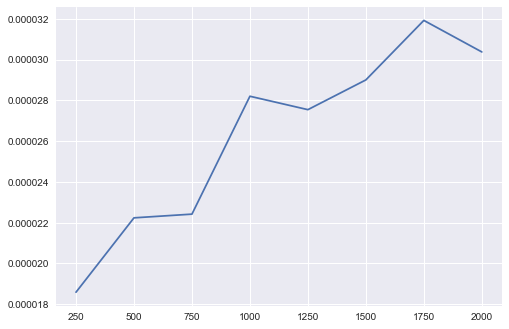

In [143]:
plt.plot(d,dmy)

# SPATIAL VARIANCE

$${σ_x}^2= \frac{{m_2}}{{m_0}} -μ^2  ---where--- (μ = \frac{{m_1}}{{m_0}})$$

### x-direction

### y-direction

### y-direction with moving average

# computing diffusion coeficient

${s_x}^2 = 2{D_m}_xt$

### x-direction

${s_y}^2 = 2{D_m}_yt$

### y- direction with moving average

# Dispersivity

### x-direction

### y-direction

### y- direction with moving average